In [1]:
#!pip install pandas numpy matplotlib 

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
#warnings.filterwarnings("ignore")

#Split Data Train and Test
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

#Modelling
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
#from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

In [3]:
#!pip install missingno

In [4]:
# Load the dataset
redwine = pd.read_csv('winequality-red.csv')
print(redwine.columns.values)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


### Statistics Analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


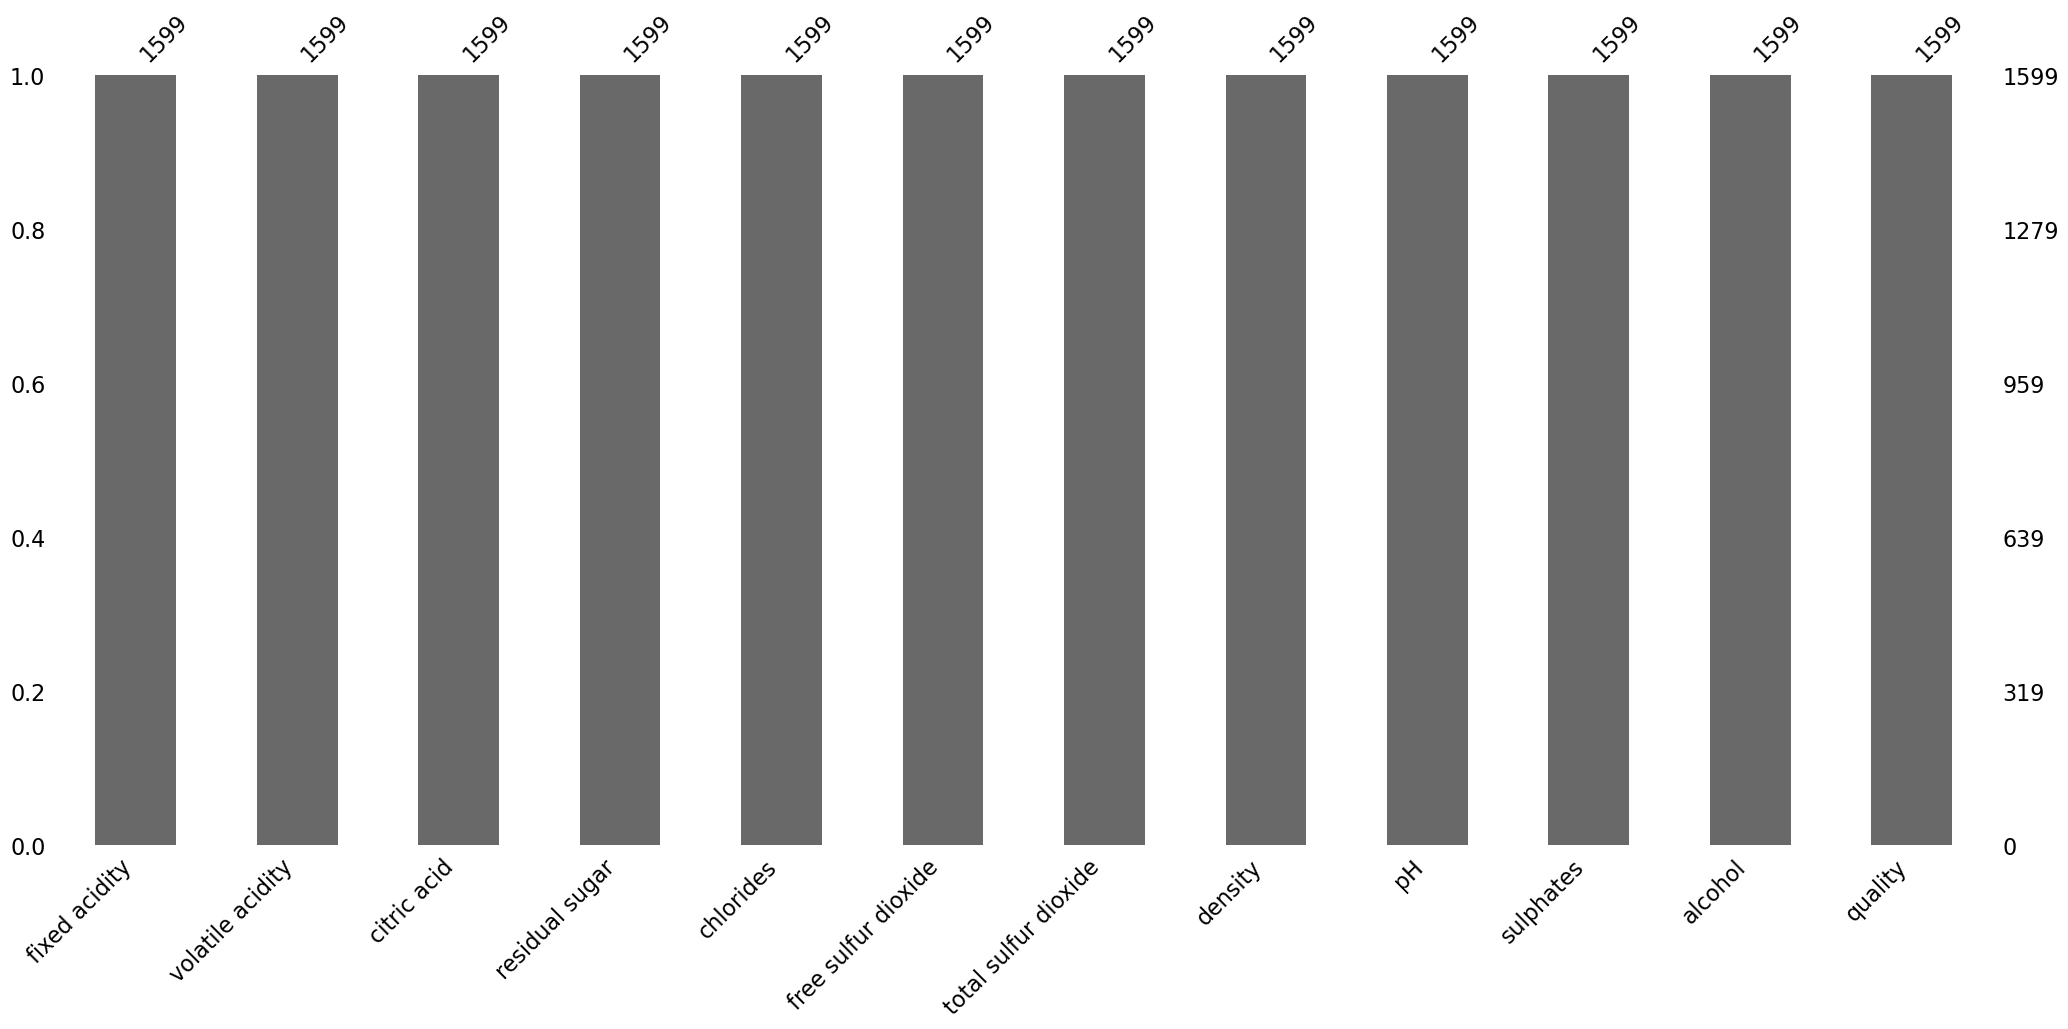

In [5]:
# Check Dataset info
import missingno as msn
msn.bar(redwine);
redwine.info();

In [6]:
# Check for Null values
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Perform EDA

In [7]:
# Check Exploratory Data Analysis
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='density', ylabel='alcohol'>

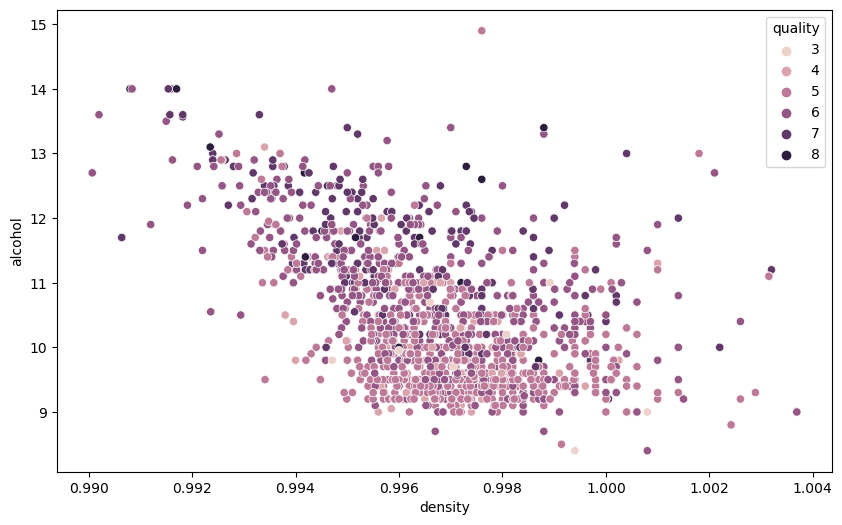

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='density', y='alcohol', data= redwine, hue='quality')

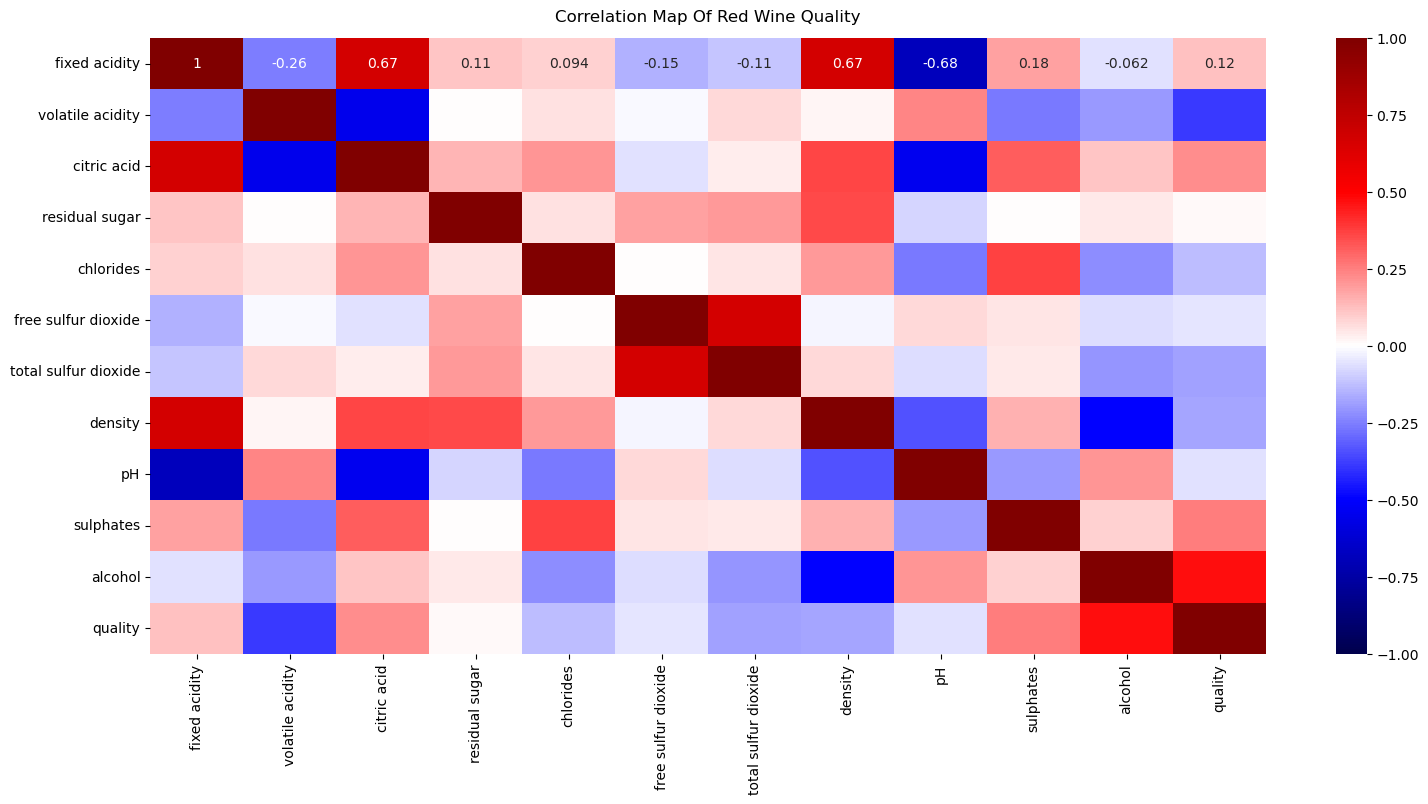

In [9]:
plt.figure(figsize=(18, 8))
sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True, cmap='seismic')
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize':12}, pad=12);

### RedWine Preprocessing

In [10]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
redwine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

if the quality value >= 6, it means the quality is good and I define it as 1.


if the quality value <= 6, it means the quality is bad and I define it as 0.

In [12]:
redwine['quality'] = np.where(redwine['quality'] >= 6, 1, 0)
redwine['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

### Splitting Data

In [13]:
X = redwine.drop(['quality'], axis = 1)
y = redwine['quality']

In [14]:
X.shape

(1599, 11)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.3, random_state = 1111)

In [16]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    y_pred_train = knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

NameError: name 'accuracy_score' is not defined

### Best K-Score and Accuracy with Normalized Dataset

In [ ]:
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

## Feature Engineering

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
X.shape

In [ ]:
#Using SelectKBest feature selection
X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)

In [ ]:
X_new.shape

In [ ]:
X_new

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y, stratify = y, test_size = 0.3, random_state = 1111)

In [ ]:
# Accuracy score Matrix model test using best selected features
k = range(1,50,2)
testing_accuracy = []
training_accuracy = []

score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    pipe_knn.fit(X_train, y_train)
    
    y_pred_train = pipe_knn.predict(X_train)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = pipe_knn.predict(X_test)
    acc_score = accuracy_score(y_test,y_pred_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
        
print('Best Accuracy Score', score, 'Best K-Score', best_k)

In [ ]:
# Precision score Matrix model test using best selected features

k = range(1,50,2)
testing_precision = []
training_precision = []

score = 0

# for i in k:
knn = KNeighborsClassifier(n_neighbors = i)
pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
pipe_knn.fit(X_train, y_train)

#     y_pred_train = pipe_knn.predict(X_train)
#     training_precision.append(precision_score(y_train, y_pred_train))

y_pred_test = pipe_knn.predict(X_test)
#     pre_score = precision_score(y_test,y_pred_test)
metric_score = precision_recall_fscore_support(y_test, y_pred_test, labels=None, average='micro', warn_for=('precision', 'recall', 'f-score'), zero_division='warn')
print('Precision Score: ', metric_score)
# testing_precision.append(pre_score)
    
#     if score < pre_score:
#         score = pre_score
#         best_k = i
        
print('Best Precision Score', score, 'Best K-Score', best_k)

In [ ]:
#Matrix model test using best selected features

k = range(1,50,2)
testing_precision = []
training_precision = []

score = 0

precision_recall_fscore_support(y_true, y_pred, *, beta=1.0, labels=None, pos_label=1, average=None, warn_for=('precision', 'recall', 'f-score'), sample_weight=None, zero_division='warn')
    
    if score < precision_recall_fscore_support_score:
        score = preprecision_recall_fscore_support_score
        best_k = i
        
print('Best Matrix Score', score, 'Best K-Score', best_k)